# Using SVM to classify text data with labels.

## Introduction

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In this document, I use SVM to classify the cleaned text data with labels. The dataset is from Twitter with the keyword personal credit, associated with my record data, whose labels are the result of sentiment analysis, which are neutral, negative and positive.

To improve the accuracy of the classifier, I also perform parameter selection to improve the performance of the model by reducing the number of parameters and eliminating some parameters that are not highly relevant. Next, I debug the parameters of the model through a series of methods to find the most suitable hyperparameters for the model, and train the optimal model to arrive at the final classifier.

## Theory

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

![](svm.png)

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane.



## Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
text = pd.read_csv("Labeled_text_data.csv")
text = text.drop(columns=['Unnamed: 0'])
text.head()

,text,Positive,Negative,Neutral,Compound,Sentiment,sentiment
0,r how credit meta ball studios mcq lgz,0.302,0.000,0.698,0.3818,Positive,1
1,r justin herbert gets too much credit for bein...,0.219,0.143,0.637,0.2263,Positive,1
2,r fo new do de santis charli cris with,0.000,0.000,1.000,0.0000,Neutral,0
3,r saturns more xgx image nas y z,0.000,0.000,1.000,0.0000,Neutral,0
4,r justin herbert gets too much credit for bein...,0.219,0.143,0.637,0.2263,Positive,1


**Distributions of class labels**

In [3]:
text.sentiment.value_counts()

0    154
1     81
2     15
Name: sentiment, dtype: int64

### Baseline Model of SVM

Before text classification by SVM, first you have to split the words, create the bow model, and then vectorize the words with countvectorizer() function in scikit-learn.

In [4]:
text['token'] = text['text'].str.split(' ')
text['token'] = text['token'].astype(str)
text.head()

,text,Positive,Negative,Neutral,Compound,Sentiment,sentiment,token
0,r how credit meta ball studios mcq lgz,0.302,0.000,0.698,0.3818,Positive,1,"['r', 'how', 'credit', 'meta', 'ball', 'studio..."
1,r justin herbert gets too much credit for bein...,0.219,0.143,0.637,0.2263,Positive,1,"['r', 'justin', 'herbert', 'gets', 'too', 'muc..."
2,r fo new do de santis charli cris with,0.000,0.000,1.000,0.0000,Neutral,0,"['r', 'fo', 'new', 'do', 'de', 'santis', 'char..."
3,r saturns more xgx image nas y z,0.000,0.000,1.000,0.0000,Neutral,0,"['r', 'saturns', 'more', 'xgx', 'image', 'nas'..."
4,r justin herbert gets too much credit for bein...,0.219,0.143,0.637,0.2263,Positive,1,"['r', 'justin', 'herbert', 'gets', 'too', 'muc..."


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(text['token'])

Split the data into training and test sets and view the dimensions.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X = BOW
y = text['sentiment']
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(text["sentiment"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 828)
(63, 828)
(187,)
(63,)


Create the svm classification model, set the initial kernel to rbf, train the data, and record the time spent training the model. Then make predictions.

In [7]:
from sklearn.svm import SVC
import time

start_time = time.time()

model = SVC(kernel='rbf')
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 0.01 seconds


In [8]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

**Calculate the accuracy on both train set and test set.** 

The result on test set is much more higher than that on train set.

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy(test) of model is {}%".format(accuracy_score(y_test,yp_test) * 100))
print("Accuracy(train) of model is {}%".format(accuracy_score(y_train,yp_train) * 100))

Accuracy(test) of model is 85.71428571428571%
Accuracy(train) of model is 93.58288770053476%


**Confusion Matrix** 

confusion matrix of training set

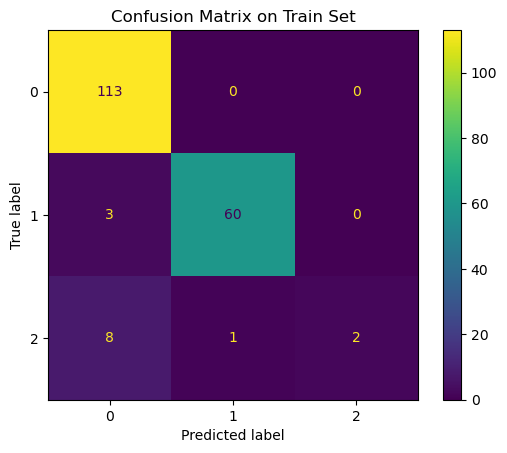

In [10]:
cm = confusion_matrix(y_train, yp_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix on Train Set")
plt.show()

confusion matrix of test set

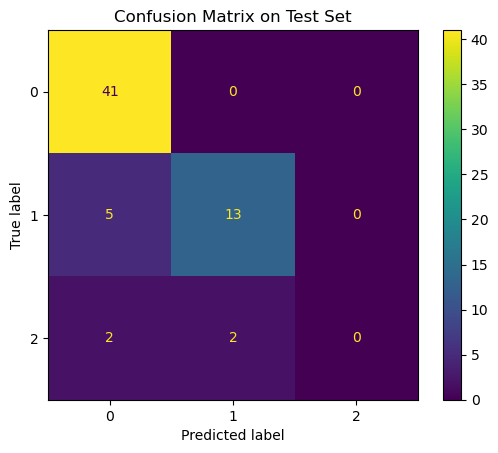

In [11]:
cm = confusion_matrix(y_test, yp_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix on Test Set")
plt.show()

**Then calculate the precision and recall for each set.**

In [12]:
from sklearn.metrics import classification_report
# train
print("------TRAIN------")
print(classification_report(y_train,yp_train))
# test
print("------TEST------")
print(classification_report(y_test,yp_test))

------TRAIN------
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       113
           1       0.98      0.95      0.97        63
           2       1.00      0.18      0.31        11

    accuracy                           0.94       187
   macro avg       0.96      0.71      0.74       187
weighted avg       0.94      0.94      0.92       187

------TEST------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       0.87      0.72      0.79        18
           2       0.00      0.00      0.00         4

    accuracy                           0.86        63
   macro avg       0.57      0.57      0.57        63
weighted avg       0.80      0.86      0.82        63



/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wangshiyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Selection

In this part, I used the univariate feature selection. Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

SelectKBest removes all but the  highest scoring features

We can see the effect of this model where the shape of X changes from (250,828) to (250,10). k=10 is the value of manual settings.

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)

In [14]:
X.shape

(250, 828)

In [15]:
X_new.shape

(250, 10)

### Model Tuning

In this part, I used GridSearchCV() method to tune the best hyperparameters for the SVM model. Parameters to be tuned are C, gamma and kernel.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [19]:
print(grid.best_estimator_)

SVC(C=100, gamma=0.01)


See the classification report and confusion matrix of the optimal model.

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print(accuracy_score(y_test,grid_predictions))

[[41  0  0]
 [ 5 13  0]
 [ 1  2  1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       0.87      0.72      0.79        18
           2       1.00      0.25      0.40         4

    accuracy                           0.87        63
   macro avg       0.91      0.66      0.71        63
weighted avg       0.88      0.87      0.86        63

0.873015873015873


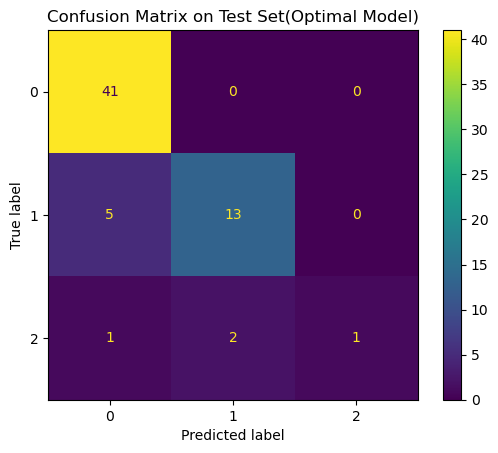

In [21]:
cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.title("Confusion Matrix on Test Set(Optimal Model)")
plt.show()

## Result

Generally speaking, the model performance of SVM on labeled text data is very satisfying. The overall classification accuracy is 0.95 on train set and 0.86 on test set. To see whether I can further improve the model performance, I implemented the feature selection and parameters tuning. For feature selection, I used `SelectKBest` function to select top K variables from the original text data; for hyper-parameters tuning, I used `GridSearchCV` function to select the best model and then train the best model as my final result. And I successfully improved the accuracy to 0.87 on test set which means 87% of data were correctly classified.

## Conclusions

Here I summarized some pros and cons for the SVM model.

**Pros and Cons associated with SVM**
* Pros:
    * It works really well with a clear margin of separation
    * It is effective in high dimensional spaces.
    * It is effective in cases where the number of dimensions is greater than the number of samples.
    * It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Cons:
    * It doesn’t perform well when we have large data set because the required training time is higher
    * It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
    * SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

Also, support vector machine allows you to classify data that’s linearly separable. If it isn’t linearly separable, you can use the kernel trick to make it work. However, for text classification it’s better to just stick to a linear kernel.

## References

https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/